<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_13_kernel_density_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kernel density estimation (KDE) is in some senses an algorithm that takes the mixture-of-Gaussians idea to its logical extreme: it uses a
mixture consisting of one Gaussian component per point, resulting in an essentially nonparametric estimator of density.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#Motivating KDE: Histograms

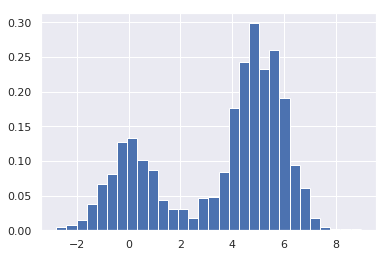

In [4]:
def make_data(N, f=0.3, rseed=1):
  rand = np.random.RandomState(rseed)
  x = rand.randn(N)
  x[int(f * N):] += 5
  return x

x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

In [6]:
# histogram is normed = area equa to 1
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

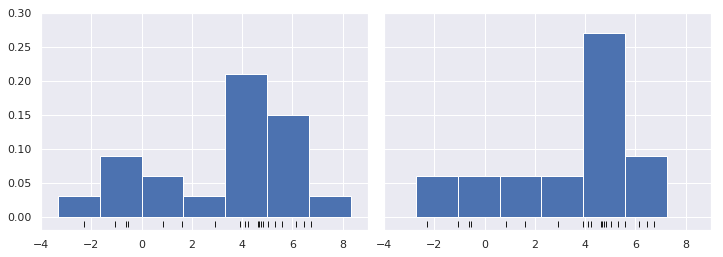

In [9]:
# main issue: depending on bins histograms
# have qualitatively different features
x = make_data(20)
bins = np.linspace(-5, 10, 10)
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
  ax[i].hist(x, bins=bins + offset, density=True)
  ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
  
# is it unimodal or bimodal?

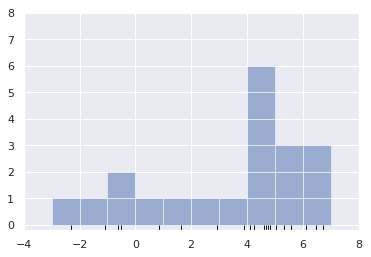

In [11]:
# histogram as blocks
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
  for i in range(count):
    ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
    ax.set_xlim(-4, 8)
    ax.set_ylim(-0.2, 8)

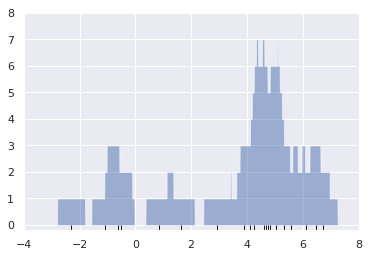

In [12]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8]);
# blocks center on each individual point; this is an example of a kernel density estimate

# a "tophat" kernel

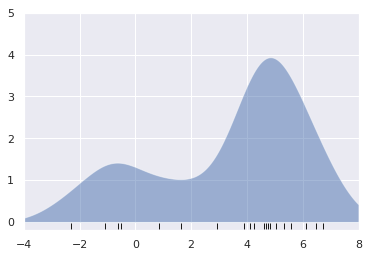

In [13]:
# replace every block with gaussian, sum up
from scipy.stats import norm

x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5]);

# a Gaussian kernel

#Kernel Density Estimation in Practice